Este projeto tem como objetivo treinar um modelo de classificação para prever o Score de Crédito de um indivíduo, utilizando o conjunto de dados fornecido no Kaggle.


O principal objetivo é desenvolver um modelo de Machine Learning capaz de classificar os clientes em diferentes categorias de Score de Crédito (e.g., Good, Standard, Poor) com base em diversas variáveis de entrada.


O dataset contém uma variedade de recursos que influenciam a pontuação de crédito de um cliente, incluindo:

    Informações Pessoais: Idade, Gênero, Estado Civil, etc.

    Detalhes Financeiros: Renda Anual, Ocupação, Histórico de Empréstimos, Saldo Bancário, etc.

    Comportamento de Crédito: Dívida, Pagamentos Atrasados, Utilização de Crédito, etc.


O projeto seguirá as etapas padrão de um pipeline de Machine Learning:

    Exploração e Limpeza de Dados: Análise exploratória de dados (EDA), tratamento de valores ausentes e outliers.

    Pré-processamento de Dados: Codificação de variáveis categóricas e escalonamento de variáveis numéricas.

    Seleção e Treinamento do Modelo: Avaliação de diferentes algoritmos de classificação (como Regressão Logística, Random Forest, etc.).

    Avaliação: Medição da performance do modelo usando métricas como Acurácia, Precisão, Recall e F1-Score.

### **Exploração de Dados**

**Importações e carregamento de dataset**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import kagglehub
import os # Import the os module to handle file paths

import warnings
warnings.filterwarnings("ignore")

# Carregando o dataset


# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

print("Path to dataset files:", path)

# List the contents of the downloaded directory to find the correct CSV file
print("Contents of downloaded directory:", os.listdir(path))

# Construct the full path to the CSV file (using 'train.csv' based on the directory contents)
csv_file_path = os.path.join(path, "train.csv")
df_original = pd.read_csv(csv_file_path)

df = df_original.copy()
df = df.astype(str)

df.head()

Path to dataset files: C:\Users\andre\.cache\kagglehub\datasets\parisrohan\credit-score-classification\versions\1
Contents of downloaded directory: ['test.csv', 'train.csv']


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8433333333328,3,...,_,809.98,26.822619623699016,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,nan,3,...,Good,809.98,31.94496005538421,nan,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,nan,3,...,Good,809.98,28.60935202206993,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,nan,3,...,Good,809.98,31.377861869582357,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8433333333328,3,...,Good,809.98,24.797346908844982,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Com essa distribuição por classes consguimos ter uma ideia de qua é a frequência de cada uma, tendo **"Standard"** como mais frequente!

**Informações gerais do dataset**

In [ ]:

print("Formato:", df.shape)
print("\nTipos das colunas:\n")
print(df.info())

print("\nResumo estatístico:\n")
df.describe(include="all").T


Formato: (100000, 28)

Tipos das colunas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        100000 non-null  object
 1   Customer_ID               100000 non-null  object
 2   Month                     100000 non-null  object
 3   Name                      100000 non-null  object
 4   Age                       100000 non-null  object
 5   SSN                       100000 non-null  object
 6   Occupation                100000 non-null  object
 7   Annual_Income             100000 non-null  object
 8   Monthly_Inhand_Salary     100000 non-null  object
 9   Num_Bank_Accounts         100000 non-null  object
 10  Num_Credit_Card           100000 non-null  object
 11  Interest_Rate             100000 non-null  object
 12  Num_of_Loan               100000 non-null  object
 13  Type_of_Loan     

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,100000,10140,nan,9985
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,17273.83,16
Monthly_Inhand_Salary,100000,13236,nan,15002
Num_Bank_Accounts,100000,943,6,13001


Analizamos a distribuição de classes em credit score, a feature que nosso modelo irá prever, e verficamos que Standard é a mais comum

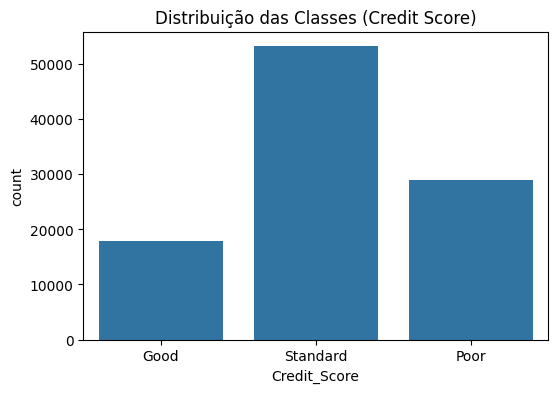

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Credit_Score")
plt.title("Distribuição das Classes (Credit Score)")
plt.show()


### **Preprocessamento de Dados**

A análise descritiva inicial (df.describe(include="all")) revelou que muitas colunas apresentam valores NaN nas estatísticas numéricas. Isso ocorre porque diversas variáveis que deveriam ser numéricas estão armazenadas como texto (object) devido a ruídos no dataset, como a presença de símbolos, palavras misturadas com números e formatações inconsistentes.


Exemplos incluem: Num_of_Loan, Num_Credit_Card, Interest_Rate, Num_of_Delayed_Payment e Num_Credit_Inquiries. Nessas colunas, o Pandas não consegue calcular média, desvio padrão ou percentis, exibindo apenas informações categóricas (count, unique, top, freq).


Esse diagnóstico evidencia a necessidade de uma etapa robusta de limpeza e correção de tipos, precedendo qualquer modelagem. Essa etapa envolveu:

  remoção de caracteres inválidos;

  conversão explícita para valores numéricos;

  tratamento de valores faltantes;

  imputação para casos impossíveis ou ilegíveis.

In [3]:
import pandas as pd
import re

def convert_to_months(duration_str):
    """
    Converte as strings de Credit_History_Age pra números contando os meses
    """
    if isinstance(duration_str, int) or isinstance(duration_str, float):
      return duration_str

    if pd.isna(duration_str):
        return 0

    # Usa regex pra achar anos e meses
    years_match = re.search(r'(\d+)\s*Year[s]?', duration_str, re.IGNORECASE)
    months_match = re.search(r'(\d+)\s*Month[s]?', duration_str, re.IGNORECASE)

    years = int(years_match.group(1)) if years_match else 0
    months = int(months_match.group(1)) if months_match else 0

    total_months = (years * 12) + months
    return total_months


df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)


In [4]:
import pandas as pd
import numpy as np

def imputar_outliers_iqr_mediana(df: pd.DataFrame, nome_coluna: str, min_valor: float = None, max_valor_explicito: float = None, usar_iqr_limite: bool = True) -> pd.DataFrame:
    """
    Substitui valores não numéricos, valores NaN e outliers em uma coluna específica pela mediana.
    Os outliers são identificados usando o Limite Superior do IQR (Q3 + 1.5 * IQR),
    a menos que um max_valor_explicito seja fornecido.

    Parâmetros:
    - df: DataFrame do pandas.
    - nome_coluna: Nome da coluna a ser tratada.
    - min_valor (opcional): Valor mínimo aceitável. Valores < min_valor são imputados.
    - max_valor_explicito (opcional): Valor máximo aceitável definido pelo usuário.
      Se fornecido, este valor é usado em vez do limite IQR.
    - usar_iqr_limite (opcional): Se True e max_valor_explicito for None, o Limite Superior
      do IQR é calculado e usado como limite superior. Padrão: True.

    Retorna:
    - O DataFrame modificado.
    """
    # 1. Verificação da coluna e conversão para numérico (erros viram NaN)
    if nome_coluna not in df.columns:
        raise ValueError(f"A coluna '{nome_coluna}' não existe no DataFrame.")

    # Copia a coluna para evitar SettingWithCopyWarning e garantir o tipo float
    df_temp = df.copy()
    df_temp[nome_coluna] = pd.to_numeric(df_temp[nome_coluna], errors='coerce')

    coluna_series = df_temp[nome_coluna]

    # 2. Definição do Limite Superior
    limite_superior_final = max_valor_explicito

    if max_valor_explicito is None and usar_iqr_limite:
        # A mediana e os quartis devem ser calculados apenas com os dados VÁLIDOS
        # (não-NaNs e, idealmente, já filtrados pelo min_valor se ele existir)

        # Filtra temporariamente NaNs e valores < min_valor (se houver) para o cálculo do IQR
        dados_validos_para_iqr = coluna_series.dropna()
        if min_valor is not None:
             dados_validos_para_iqr = dados_validos_para_iqr[dados_validos_para_iqr >= min_valor]

        if dados_validos_para_iqr.empty:
            print(f"Aviso: Dados insuficientes para calcular IQR na coluna '{nome_coluna}'.")
            return df

        # Cálculo do IQR
        Q1 = dados_validos_para_iqr.quantile(0.25)
        Q3 = dados_validos_para_iqr.quantile(0.75)
        IQR = Q3 - Q1

        # Limite Superior do IQR (k=1.5)
        limite_superior_final = Q3 + (1.5 * IQR)

    # 3. Aplicação do Filtro e Imputação (Transformar Outliers em NaN)

    # Filtro de Limite Mínimo Explícito
    if min_valor is not None:
        min_valor = float(min_valor)
        df_temp.loc[coluna_series < min_valor, nome_coluna] = np.nan

    # Filtro de Limite Máximo (IQR ou Explícito)
    if limite_superior_final is not None:
        df_temp.loc[coluna_series > limite_superior_final, nome_coluna] = np.nan

    # 4. Cálculo da Mediana (Calculada apenas com os dados VÁLIDOS restantes)
    mediana = df_temp[nome_coluna].median()

    # Se a mediana não puder ser calculada (todos NaN), retorna o DataFrame original ou trata o erro
    if pd.isna(mediana):
        print(f"Erro: Todos os valores na coluna '{nome_coluna}' são NaN após a limpeza. Nenhuma imputação foi realizada.")
        return df

    # 5. Preenchimento dos valores ausentes com a mediana
    df[nome_coluna] = df_temp[nome_coluna].fillna(mediana)

    # 6. Atualiza o DataFrame original
    return df

df = imputar_outliers_iqr_mediana(df, "Interest_Rate")
df = imputar_outliers_iqr_mediana(df, "Num_of_Loan", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Num_Credit_Card", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Num_of_Delayed_Payment", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Num_Credit_Inquiries", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Num_Bank_Accounts", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Annual_Income", min_valor=0, max_valor_explicito=3e7, usar_iqr_limite=False)
df = imputar_outliers_iqr_mediana(df, "Age", min_valor=0, max_valor_explicito=120, usar_iqr_limite=False)
df = imputar_outliers_iqr_mediana(df, "Credit_Utilization_Ratio", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Monthly_Balance", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Amount_invested_monthly", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Total_EMI_per_month", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Monthly_Inhand_Salary", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Outstanding_Debt", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Changed_Credit_Limit", min_valor=0)
df = imputar_outliers_iqr_mediana(df, "Credit_History_Age", min_valor=0)


print("\nResumo estatístico pós imputação:\n")
df.describe(include="all").T


Resumo estatístico pós imputação:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,100000,10140,nan,9985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000.0,NaN,NaN,NaN,33.29804,10.378526,14.0,25.0,33.0,41.0,118.0
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000.0,NaN,NaN,NaN,168735.19415,1392074.520679,7005.93,20062.86,37550.74,70064.92,24198062.0
Monthly_Inhand_Salary,100000.0,NaN,NaN,NaN,3839.366972,2672.838341,303.645417,1792.084167,3038.445,5144.525833,12452.33
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,5.36405,2.575423,0.0,3.0,5.0,7.0,11.0


**Remoção de colunas com alta cardinalidade**

In [5]:
cols_to_drop = ['ID', 'Customer_ID', 'SSN', 'Name']
df = df.drop(columns=cols_to_drop, axis=1)

### **Treinamento do Modelo**

In [6]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# 1. Separação das Variáveis (X) e do Alvo (y)
# Remove a coluna alvo das features
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Mapear Target para Números (XGBoost exige isso: Good=2, Standard=1, Poor=0)
label_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
y = y.map(label_mapping)

# Divisão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Atualizar listas de colunas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# --- 3. PIPELINE ATUALIZADO ---
# Mantemos os processadores iguais
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

**1° Algoritmo: Gradient Boosting - XGBoost**




In [7]:
# O XGBoost lida melhor com a distinção sutil entre classes
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=200,
        learning_rate=0.3,
        max_depth=6,             # Profundidade menor evita overfitting
        random_state=42,
        n_jobs=-1,
        eval_metric='mlogloss'   # Métrica para multiclasse
        # Removemos class_weight='balanced' pois o XGBoost lida bem com isso internamente
        # ou usa scale_pos_weight para binário (mas aqui é multiclasse)
    ))
])

# Se preferir manter Random Forest, altere class_weight para None ou manual:
# class_weight={0: 2, 1: 1, 2: 2} # Dá peso dobro para Poor e Good, mas mantém Standard normal

print("Treinando modelo melhorado...")
pipeline.fit(X_train, y_train)

print("Avaliando...")
y_pred = pipeline.predict(X_test)
from sklearn.metrics import classification_report
# Precisamos mapear os nomes de volta para o relatório ficar legível
target_names = ['Poor', 'Standard', 'Good']
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (raw):\n", cm)

Treinando modelo melhorado...
Avaliando...
              precision    recall  f1-score   support

        Poor       0.77      0.67      0.72      5799
    Standard       0.75      0.78      0.77     10635
        Good       0.63      0.68      0.65      3566

    accuracy                           0.73     20000
   macro avg       0.72      0.71      0.71     20000
weighted avg       0.73      0.73      0.73     20000

Confusion Matrix (raw):
 [[3897 1616  286]
 [1169 8343 1123]
 [  26 1123 2417]]


**2° Algoritmo: Gradient Boosting - LightGBM**


In [9]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

# Definição do Pipeline com LightGBM
pipeline_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor), # Usa o mesmo pré-processador já definido
    ('classifier', LGBMClassifier(
        n_estimators=200,
        learning_rate=0.4,
        max_depth=13,
        num_leaves=40,            # Parâmetro crítico do LGBM (relacionado à complexidade)
        random_state=42,
        n_jobs=-1,
        verbose=-1                # Remove avisos do console
    ))
])

print("--- Treinando LightGBM ---")
pipeline_lgbm.fit(X_train, y_train)

print("Avaliação LightGBM:")
y_pred_lgbm = pipeline_lgbm.predict(X_test)

from sklearn.metrics import classification_report
# Mapeamento para visualização correta (0: Poor, 1: Standard, 2: Good)
target_names = ['Poor', 'Standard', 'Good']
print(classification_report(y_test, y_pred_lgbm, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix (raw):\n", cm)

--- Treinando LightGBM ---
Avaliação LightGBM:
              precision    recall  f1-score   support

        Poor       0.76      0.76      0.76      5799
    Standard       0.79      0.80      0.79     10635
        Good       0.73      0.71      0.72      3566

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000

Confusion Matrix (raw):
 [[4380 1301  118]
 [1322 8479  834]
 [  47  971 2548]]


**3° Algoritmo: Extra Trees**




In [10]:
from sklearn.ensemble import ExtraTreesClassifier

pipeline_extra = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(
        n_estimators=200,    # Mais árvores para estabilizar a variância
        max_depth=25,
        min_samples_leaf=5,  # Controle o overfitting pela folha, não pela profundidade
        class_weight='balanced', # CRÍTICO: Obriga a olhar para 'Poor' e 'Good'
        bootstrap=False,     # Usa o dataset todo
        n_jobs=-1,
        random_state=42
    ))
])

print("\n--- Treinando Extra Trees ---")
pipeline_extra.fit(X_train, y_train)
y_pred_extrees = pipeline_extra.predict(X_test)
print(classification_report(y_test, y_pred_extrees, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_extrees)
print("Confusion Matrix (raw):\n", cm)


--- Treinando Extra Trees ---
              precision    recall  f1-score   support

        Poor       0.63      0.72      0.67      5799
    Standard       0.83      0.55      0.66     10635
        Good       0.47      0.84      0.60      3566

    accuracy                           0.65     20000
   macro avg       0.65      0.70      0.65     20000
weighted avg       0.71      0.65      0.65     20000

Confusion Matrix (raw):
 [[4160  688  951]
 [2334 5843 2458]
 [  87  467 3012]]
